# 딥러닝의 비즈니스응용
##Team B - 김민지 / 김태운 / 윤재영 / 이상림 / 홍수정

# [김민지_시작] #
[Classification] 사용한 데이터는 포르투갈 금융기관의 정기 예적금 가입을 위한 전화 마케팅 데이터세트입니다.
총 4개의 데이터[1)샘플수 41,188/속성20, 2) 샘플수4,119(10%)/속성20, 3) 샘플수 41,188/속성17, 4) 샘플수 4,119(10%)/속성17] 중 4번째 데이터를 사용하였습니다.
- Data Type : Multivariate
- Task : Classification

해당 코드는 은행 고객 데이터를 사용하여 고객이 정기 예금에 가입할지 여부를 예측하는 모델을 만들고 훈련하는 코드입니다.


- 작업을 위한 환경을 준비하고 데이터처리, 모델 구축 및 시각화를 위해 라이브러리를 불러옵니다.

In [ ]:
# 1.환경준비
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split

# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

- 사용할 은행 고객 데이터 파일을 pd.read_csv를 사용하여 DataFrame으로 가져옵니다.

In [ ]:
# 2.데이터 준비
df = pd.read_csv("./drive/MyDrive/딥러닝비즈니스응용/중간과제/bank.csv", delimiter=";")

- 가져온 데이터를 각 메소드를 사용하여 데이터를 확인 할 수 있습니다.

In [ ]:
# 데이터 확인
df.head(5)
df["y"].value_counts() # 정기예금 신청 여부 count 확인
df.info() # 속성 정보
df.describe() # 정보별 특징 확인(통계치)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


- 상관 관계를 히트맵으로 볼 수 있습니다.

<ipython-input-4-381aa85e0882>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr() # 상관관계 확인
<ipython-input-4-381aa85e0882>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), linewidths=0.1, vmax=0.5, cmap=colormap, linecolor='white', annot=True)


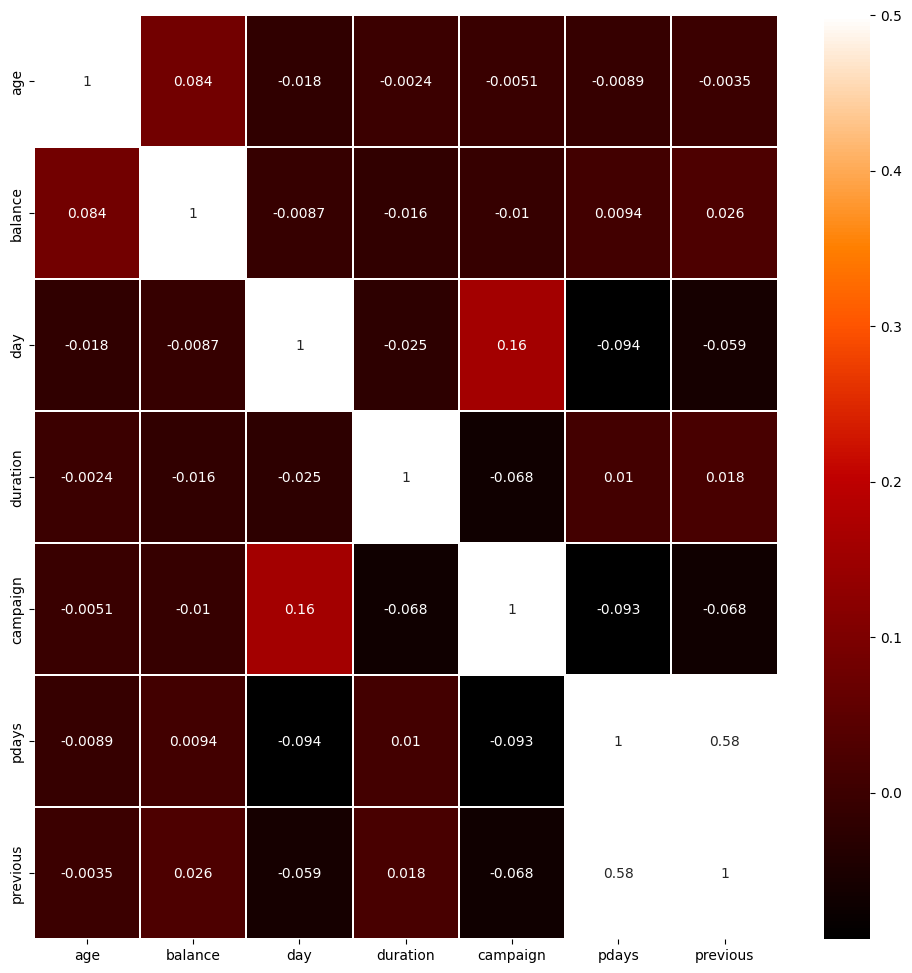

In [ ]:
df.corr() # 상관관계 확인
colormap = plt.cm.gist_heat # 그래프의 색상 구성 설정
plt.figure(figsize=(12,12)) # 그래프의 크기 설정
sns.heatmap(df.corr(), linewidths=0.1, vmax=0.5, cmap=colormap, linecolor='white', annot=True)
plt.show()

- 상관 관계를 관계 그래프로 확인합니다.

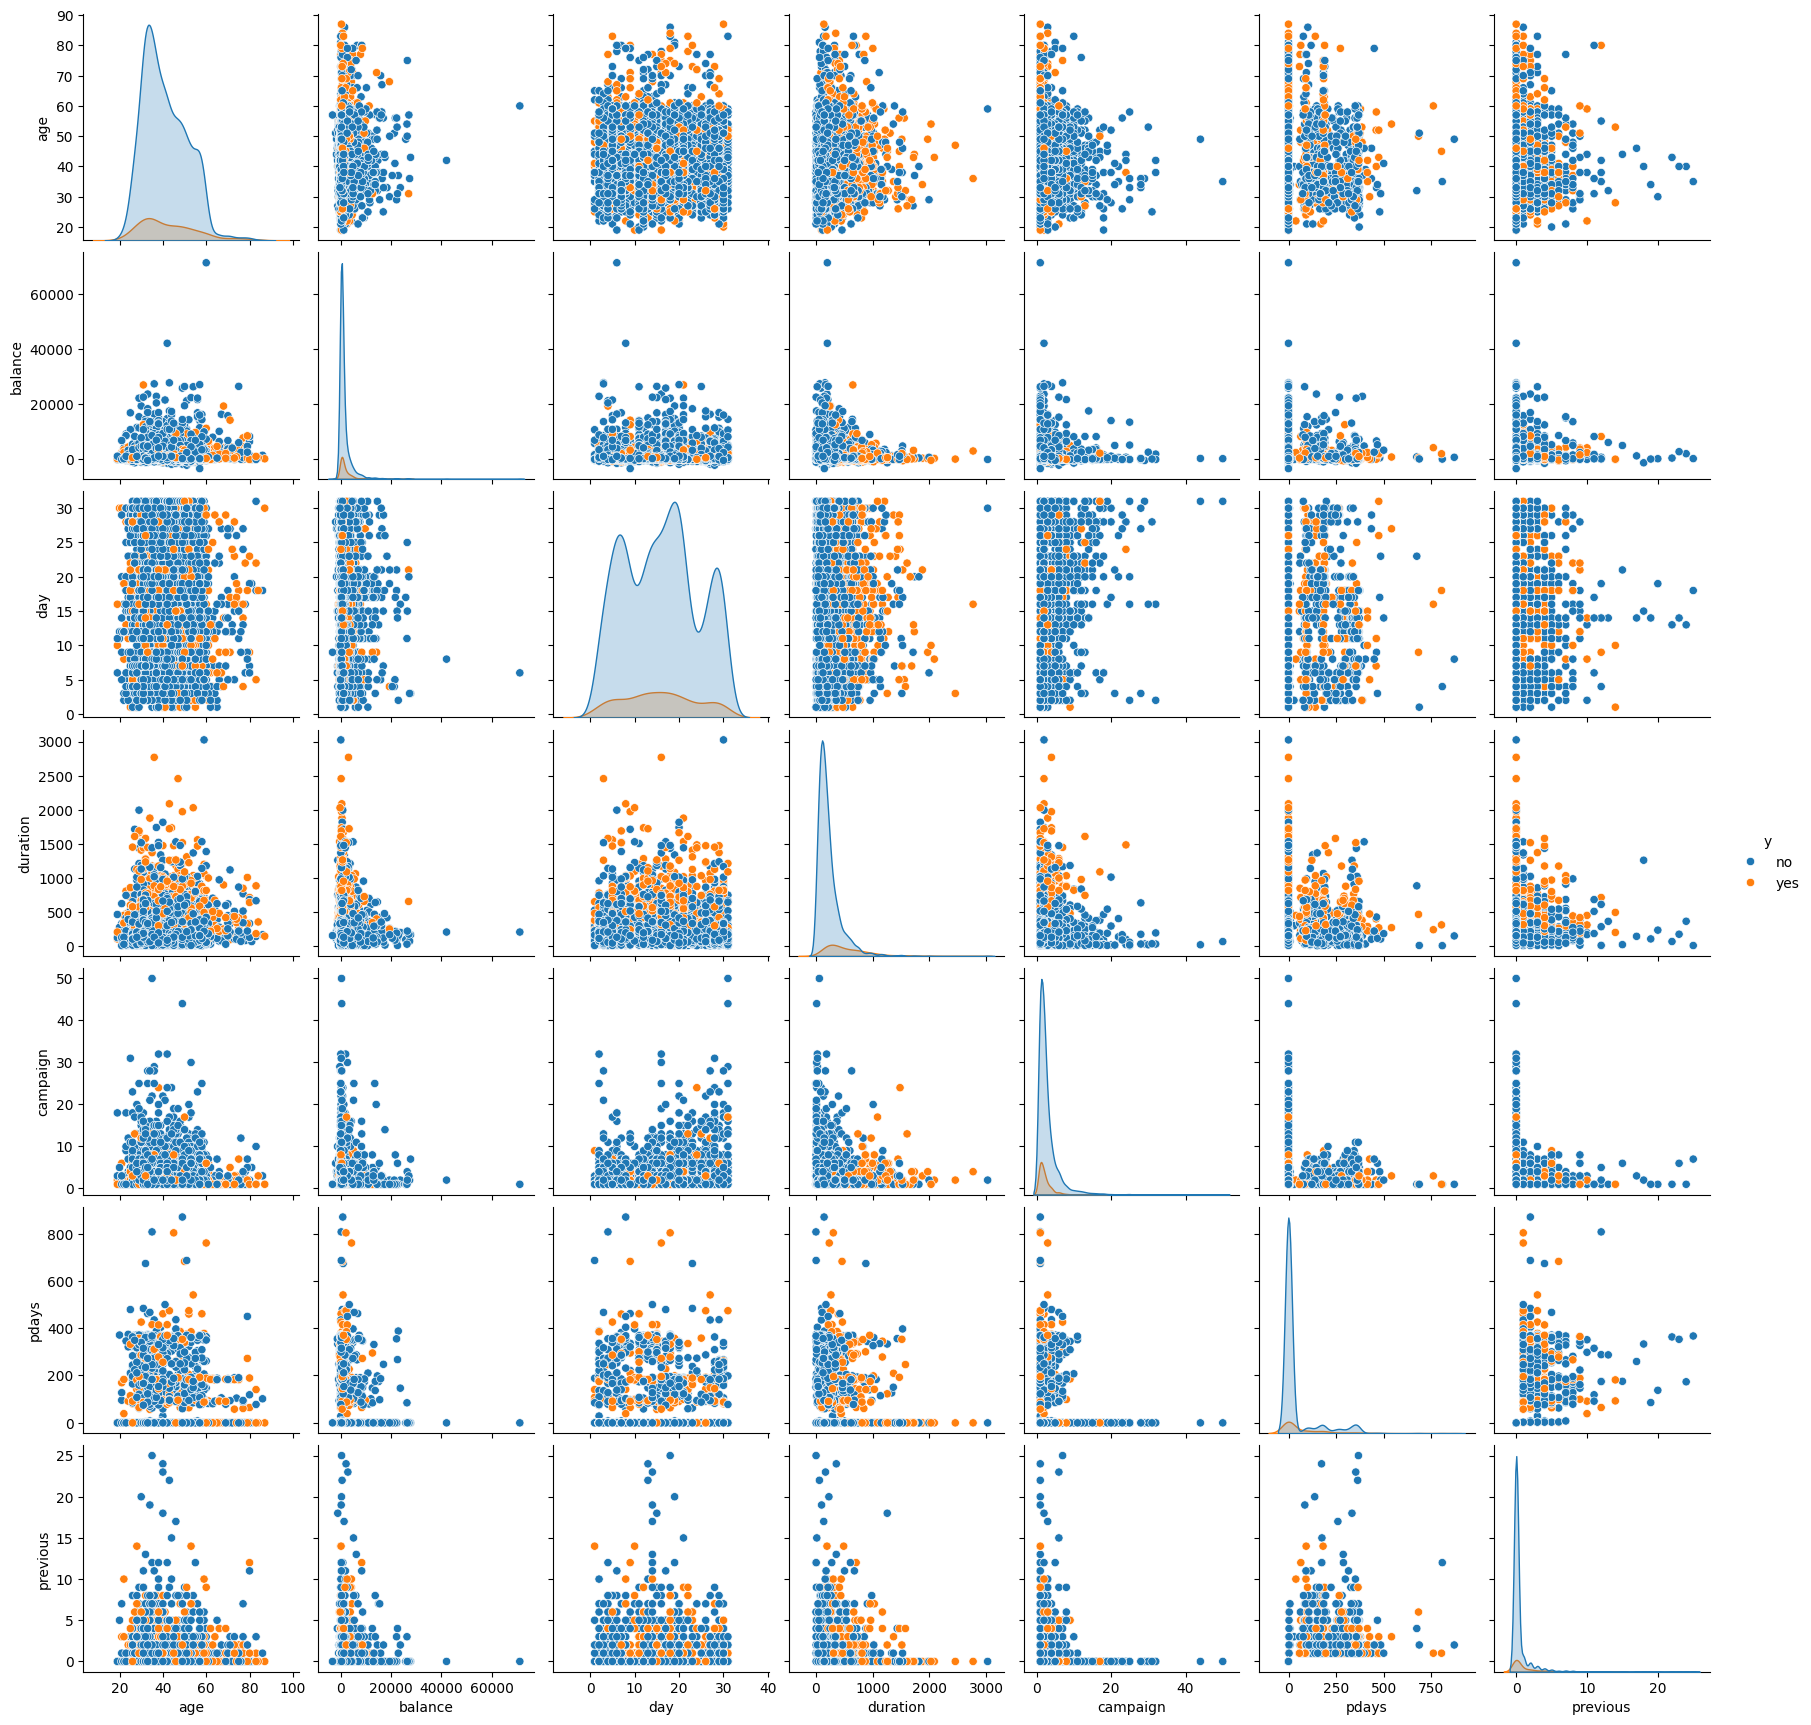

In [ ]:
# 상관도 그래프
sns.pairplot(df, hue='y');
plt.show()

# [ 김태운 시작 ]
- 데이터의 결측치(NULL)를 확인합니다.

In [ ]:
# null값체크
df.isnull().sum().sort_values(ascending=False).head(20)

age          0
day          0
poutcome     0
previous     0
pdays        0
campaign     0
duration     0
month        0
contact      0
job          0
loan         0
housing      0
balance      0
default      0
education    0
marital      0
y            0
dtype: int64

- 데이터 내 카테고리형(자료형) 속성값을 0과 1값으로 변환 처리합니다.(더미 변수로 변환)
- 딥러닝은 숫자 데이터만 처리 가능하기 때문에 변환처리 합니다.

In [1]:
# 카테고리형 속성값을 0과 1로 변환
df = pd.get_dummies(df)
df

NameError: name 'pd' is not defined

- 입력 변수(X)와 타겟 변수(y)를 분리하여 저장합니다.

In [ ]:
X = df.iloc[:,0:51] # 세부사항 X에 저장
y = df.iloc[:,51:53] # 예금 가입여부 y에 저장

X, y

(      age  balance  day  duration  campaign  pdays  previous  job_admin.  \
 0      30     1787   19        79         1     -1         0           0   
 1      33     4789   11       220         1    339         4           0   
 2      35     1350   16       185         1    330         1           0   
 3      30     1476    3       199         4     -1         0           0   
 4      59        0    5       226         1     -1         0           0   
 ...   ...      ...  ...       ...       ...    ...       ...         ...   
 4516   33     -333   30       329         5     -1         0           0   
 4517   57    -3313    9       153         1     -1         0           0   
 4518   57      295   19       151        11     -1         0           0   
 4519   28     1137    6       129         4    211         3           0   
 4520   44     1136    3       345         2    249         7           0   
 
       job_blue-collar  job_entrepreneur  ...  month_jun  month_mar  month

- 분리 저장된(X, y) 데이터를 train_test_split을 사용하여 훈련 데이터와 테스트 데이터로 분리합니다.

In [ ]:
# 학습셋과 테스트셋을 구분
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

X_train, X_test, y_train, y_test

(      age  balance  day  duration  campaign  pdays  previous  job_admin.  \
 1018   55      466   17       287         4     -1         0           0   
 2223   42       47    8       141         1     -1         0           0   
 1171   36        0   20       637         1     -1         0           1   
 1476   29        9   11       262         3     -1         0           0   
 2033   41      664   15       955         5     -1         0           0   
 ...   ...      ...  ...       ...       ...    ...       ...         ...   
 1044   44      178    8       126         2     -1         0           0   
 3276   35     2723    8       275         4     -1         0           0   
 4465   38      623   28       297         4    144         4           0   
 2500   38      807   27        74         2     -1         0           0   
 407    39      130    8       202         2     -1         0           0   
 
       job_blue-collar  job_entrepreneur  ...  month_jun  month_mar  month

- Sequential 모델을 사용하여 구조를 만듭니다. 여기에는 입력층, 은닉층, 출력층으로 구성되어있고, 각측은 Dense레이어로 구성되며, 활성화 함수로 ReLU와 softmax를 사용합니다.

In [ ]:
# 3.구조결정
model = Sequential()

model.add(Dense(30, input_dim=51, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 30)                1560      
                                                                 
 dense_20 (Dense)            (None, 12)                372       
                                                                 
 dense_21 (Dense)            (None, 8)                 104       
                                                                 
 dense_22 (Dense)            (None, 2)                 18        
                                                                 
Total params: 2054 (8.02 KB)
Trainable params: 2054 (8.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


- 손실 함수로는 다중 클래스 분류에 적합한 'categorical_crossentropy'를 사용하고, 최적화 알고리즘으로는 'adam'을 사용하며, 평가 지표로는 'accuracy'를 사용합니다.

In [ ]:
# 4.모델실행
# 모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

- 모델 업데이트하지 전 코드로 학습데이터 셋의 80%의 25%로 전체 데이터의 20%를 검증 데이터 셋으로 설정하고 모델을 학습시킵니다.
- epochs 2000, minibatch 500 입니다.

In [ ]:
# 모델 실행(모델업데이트전)
history = model.fit(X_train, y_train, epochs=2000, batch_size=500,
                    validation_split=0.25, # 검증셋 사용(80%*25%=20%)
                    verbose=1)

Epoch 1/2000
6/6 [==============================] - 1s 42ms/step - loss: 7.6842 - accuracy: 0.4974 - val_loss: 3.3090 - val_accuracy: 0.8075
Epoch 2/2000
6/6 [==============================] - 0s 8ms/step - loss: 3.4001 - accuracy: 0.8219 - val_loss: 3.5784 - val_accuracy: 0.8230
Epoch 3/2000
6/6 [==============================] - 0s 7ms/step - loss: 3.3832 - accuracy: 0.8326 - val_loss: 2.9279 - val_accuracy: 0.8418
Epoch 4/2000
6/6 [==============================] - 0s 7ms/step - loss: 2.6474 - accuracy: 0.8532 - val_loss: 2.0107 - val_accuracy: 0.8772
Epoch 5/2000
6/6 [==============================] - 0s 11ms/step - loss: 1.8655 - accuracy: 0.8658 - val_loss: 1.4817 - val_accuracy: 0.8374
Epoch 6/2000
6/6 [==============================] - 0s 7ms/step - loss: 1.5040 - accuracy: 0.8219 - val_loss: 1.1905 - val_accuracy: 0.8330
Epoch 7/2000
6/6 [==============================] - 0s 11ms/step - loss: 1.1050 - accuracy: 0.8481 - val_loss: 0.8615 - val_accuracy: 0.8628
Epoch 8/2000
6/6 

# [ 윤재영 시작 ]
- 모델의 학습 결과로 훈련 손실과 검증 손실을 그래프로 과적합에 부분을 확인 할 수 있습니다.

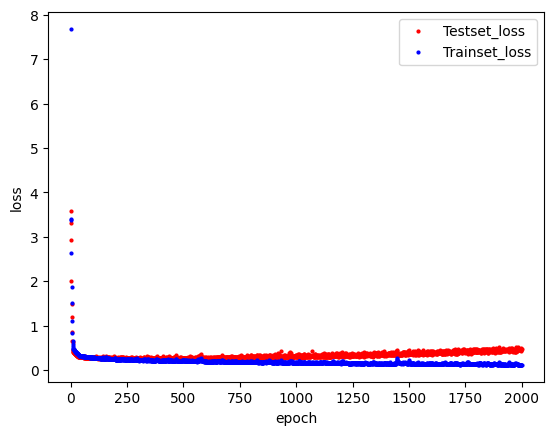

In [ ]:
#---그래프로 과적합 확인(모델업데이트전)--------------#
# history에 저장된 학습 결과를 확인
hist_df = pd.DataFrame(history.history)
hist_df

# y_vloss에 검증셋으리 오차를 저장
y_vloss = hist_df['val_loss']

# y_loss에 학습셋의 오차를 저장
y_loss = hist_df['loss']

# x값을 지정하고 검즞셋의 오차를 빨간색으로, 학습셋의 오차를 파안색으로 표시
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, "o", c="red", markersize=2, label='Testset_loss')
plt.plot(x_len, y_loss, "o", c="blue", markersize=2, label='Trainset_loss')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

- 과적합 부분을 해결하기 위해서 검증셋의 오차가 50번 이상 낮아지지 않을 경우 EarlyStoppinp함수를 이용하여 훈련을 조기에 중단시킵니다.
- ModelCheckpoint함수로 최고의 모델의 가중치를 하나 저장합니다.

In [ ]:
# 모델업데이트 - 학습의 자동 중단
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=50) #-- 검증셋의 오차가 20번 이상 낮아지지 않을 경우 학습을 종료

modelpath = "./drive/MyDrive/딥러닝비즈니스응용/중간과제/Classification_bestmodel.hdf5"   #-- 파일경로

checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)  #-- 최고 모델 하나만 저장

- 업데이트된 모델로 다시 모델을 훈련합니다.
(epochs, batch, 검증셋 분할 비율을 지정할 수 있습니다.)

In [ ]:
# 모델 실행(모델업데이트 후)
history = model.fit(X_train, y_train, epochs=2000, batch_size=500,
                    validation_split=0.25, # 검증셋 사용(80%*25%=20%)
                    verbose=1, callbacks=[early_stopping_callback, checkpointer])

Epoch 1/2000
1/6 [====>.........................] - ETA: 0s - loss: 0.1336 - accuracy: 0.9420

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 81ms/step - loss: 0.1153 - accuracy: 0.9546 - val_loss: 0.5413 - val_accuracy: 0.8850
Epoch 2/2000
6/6 [==============================] - 0s 22ms/step - loss: 0.1317 - accuracy: 0.9465 - val_loss: 0.4741 - val_accuracy: 0.8872
Epoch 3/2000
6/6 [==============================] - 0s 20ms/step - loss: 0.1363 - accuracy: 0.9428 - val_loss: 0.4626 - val_accuracy: 0.8662
Epoch 4/2000
6/6 [==============================] - 0s 16ms/step - loss: 0.1301 - accuracy: 0.9487 - val_loss: 0.4691 - val_accuracy: 0.8595
Epoch 5/2000
6/6 [==============================] - 0s 16ms/step - loss: 0.1234 - accuracy: 0.9484 - val_loss: 0.4940 - val_accuracy: 0.8673
Epoch 6/2000
6/6 [==============================] - 0s 11ms/step - loss: 0.1233 - accuracy: 0.9521 - val_loss: 0.5429 - val_accuracy: 0.8805
Epoch 7/2000
6/6 [==============================] - 0s 10ms/step - loss: 0.1299 - accuracy: 0.9462 - val_loss: 0.5089 - val_accuracy: 0.8772
Epoch 8/2000
6/6 [========

- model.evaluate를 사용하여 테스트 데이터셋에서 모델의 정확도를 평가하여 출력해줍니다.

In [ ]:
# 모델을 테스트셋에 적용해 정확도 출력
score = model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

29/29 [==============================] - 0s 1ms/step - loss: 0.8522 - accuracy: 0.8884
Test accuracy: 0.8883978128433228
